In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.datasets import load_wine
from sklearn.datasets import fetch_openml

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [3]:
dataset = fetch_openml(data_id=31)
wine = load_wine()

In [4]:
X, y = wine.data, wine.target
X.shape, y.shape

((178, 13), (178,))

<BarContainer object of 13 artists>

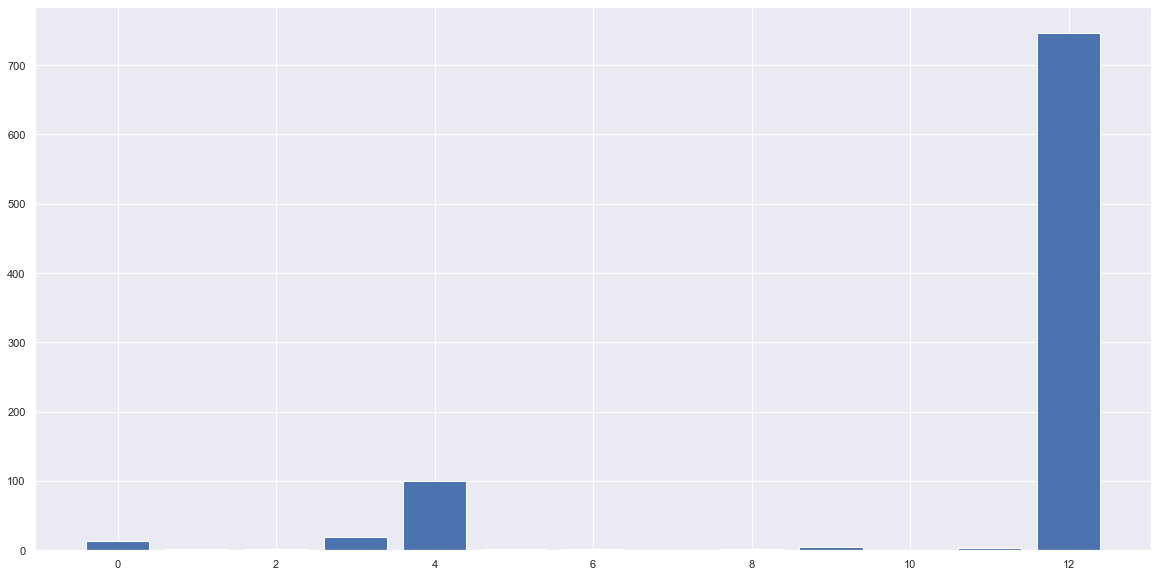

In [5]:
import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(20, 10)})
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))

<BarContainer object of 13 artists>

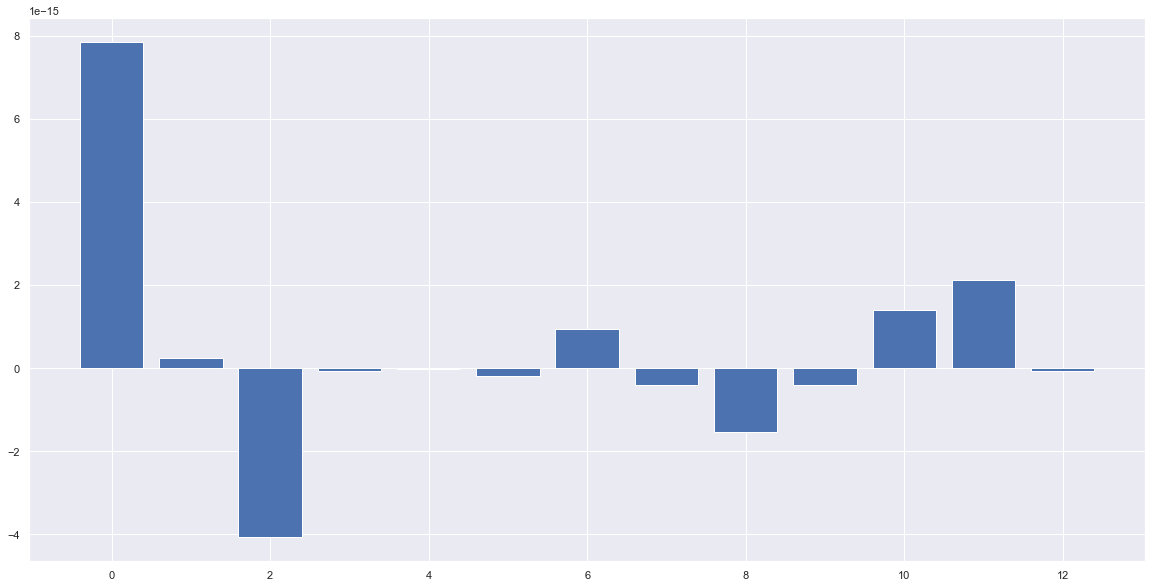

In [6]:
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

plt.bar(list(range(X.shape[1])), np.mean(X_scaled , axis=0))

In [7]:
pipeline1 = Pipeline([
    ("padronizacao", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000))
])

scoring = {'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False), 
            'r2_score': make_scorer(r2_score)}


scoreslr = cross_validate(pipeline1, X, y, scoring=scoring, cv=10)
print(scoreslr['test_mean_squared_error'])
print(scoreslr['test_r2_score'])

scoreslr1 = np.mean(scoreslr['test_mean_squared_error'])
scoreslr2 = np.mean(scoreslr['test_r2_score'])
print(f"Média test_mean_squared_error: {scoreslr1}")
print(f"Média test_r2_score: {scoreslr2}")

[-0.23570226 -0.23570226 -0.         -0.23570226 -0.         -0.
 -0.         -0.         -0.         -0.        ]
[0.90862944 0.90862944 1.         0.90862944 1.         1.
 1.         1.         1.         1.        ]
Média test_mean_squared_error: -0.07071067811865475
Média test_r2_score: 0.9725888324873097


In [8]:
pipeline2 = Pipeline([
    ("padronização", StandardScaler()),
    ("knn", KNeighborsRegressor())
])

parametros = {'knn__n_neighbors': [3,5,7]}

scoring = {'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
            'r2_score': make_scorer(r2_score)}

modelo = GridSearchCV(pipeline2, parametros, scoring='neg_root_mean_squared_error')

scoresknn = cross_validate(modelo, X, y, scoring=scoring, cv=10)
print(scoresknn['test_mean_squared_error'])
print(scoresknn['test_r2_score'])

scoresknn1 = np.mean(scoresknn['test_mean_squared_error'])
scoresknn2 = np.mean(scoresknn['test_r2_score'])
print(f"Média test_mean_squared_error: {scoresknn1}")
print(f"Média r2_score: {scoresknn2}")

[-0.         -0.13468701 -0.14677176 -0.33839691 -0.36004115 -0.20786985
 -0.35136418 -0.248452   -0.         -0.        ]
[1.         0.         0.         0.42919937 0.         0.
 0.         0.64285714 1.         1.        ]
Média test_mean_squared_error: -0.17875828689814818
Média r2_score: 0.40720565149136584


<BarContainer object of 2 artists>

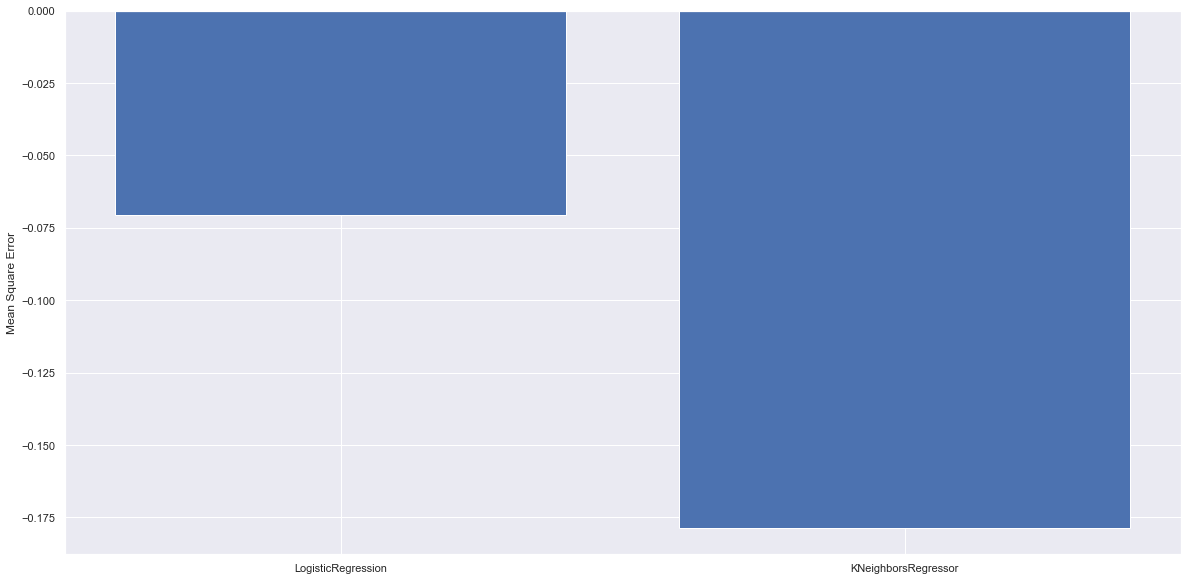

In [9]:
colunas = ['LogisticRegression', 'KNeighborsRegressor']
plt.ylabel("Mean Square Error")
plt.bar(colunas, [scoreslr1, scoresknn1])

<BarContainer object of 2 artists>

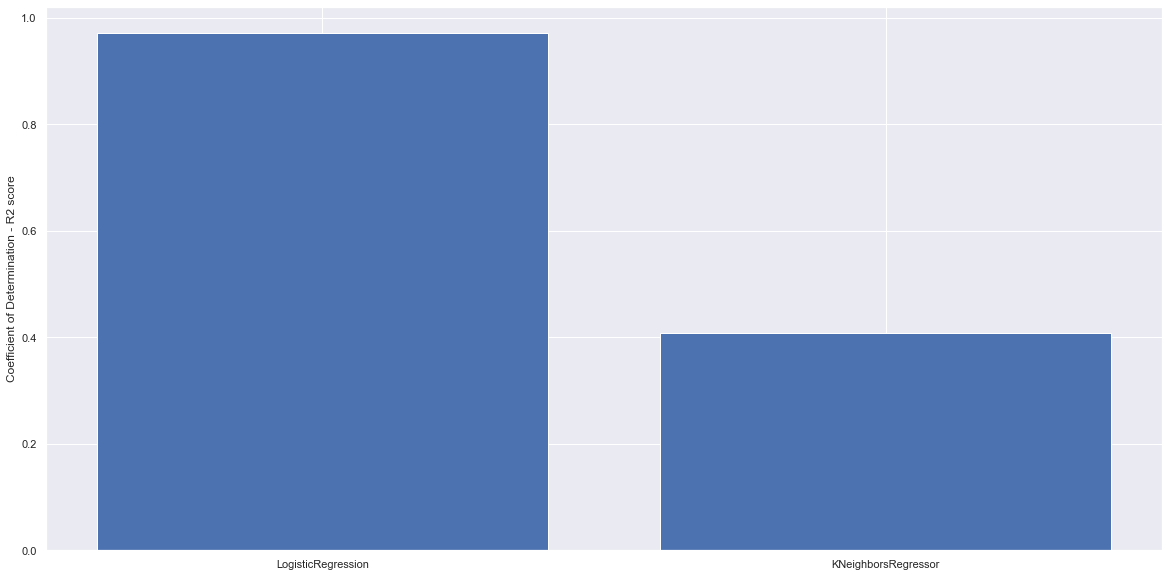

In [10]:
colunas = ['LogisticRegression', 'KNeighborsRegressor']
plt.ylabel("Coefficient of Determination - R2 score")
plt.bar(colunas, [scoreslr2, scoresknn2])